In [1]:
import pandas as pd

In [2]:
df = pd.read_csv("covid-19-seoul.csv")
df.shape

(219, 8)

In [3]:
df = df.sort_values(["연번"], ascending=False)

In [4]:
df.head()

,연번,환자,확진일,성별(출생년),거주지,여행력,접촉력,조치사항
85,219,확인중,3.12.,여('84),중랑구,-,콜센터직원 접촉,확인중
86,218,확인중,3.11.,남('74),구로구,-,콜센터직원 접촉,확인중
87,217,확인중,3.11.,남('92),성북구,-,-,서울의료원
88,216,확인중,3.11.,남('87),성북구,"독일,프랑스",해외접촉,서울의료원
89,215,확인중,3.11.,여('51),송파구,-,-,강남세브란스병원


In [5]:
df.tail()

,연번,환자,확진일,성별(출생년),거주지,여행력,접촉력,조치사항
54,5,9,1.31.,여(‵92),성북구,-,#5 접촉자,서울의료원(퇴원)
65,4,7,1.30.,남(‵91),마포구,중국 우한시,해외 접촉,서울의료원(퇴원)
76,3,6,1.30.,남(‵64),종로구,-,#3 접촉자,서울대학교병원(퇴원)
107,2,5,1.30.,남(‵87),중랑구,중국 우한시,해외 접촉,서울의료원(퇴원)
218,1,2,1.23.,남(‵64),강서구,중국 우한시,해외접촉,국립중앙의료원(퇴원)


## 시각화 도구 불러오기

In [6]:
import seaborn as sns

# sns.set(font="Malgun Gothic")
sns.set(font="AppleGothic")

### 시각화 선명하게 설정하기

In [7]:
from IPython.display import set_matplotlib_formats

set_matplotlib_formats("retina")

## 거주지별 확진자

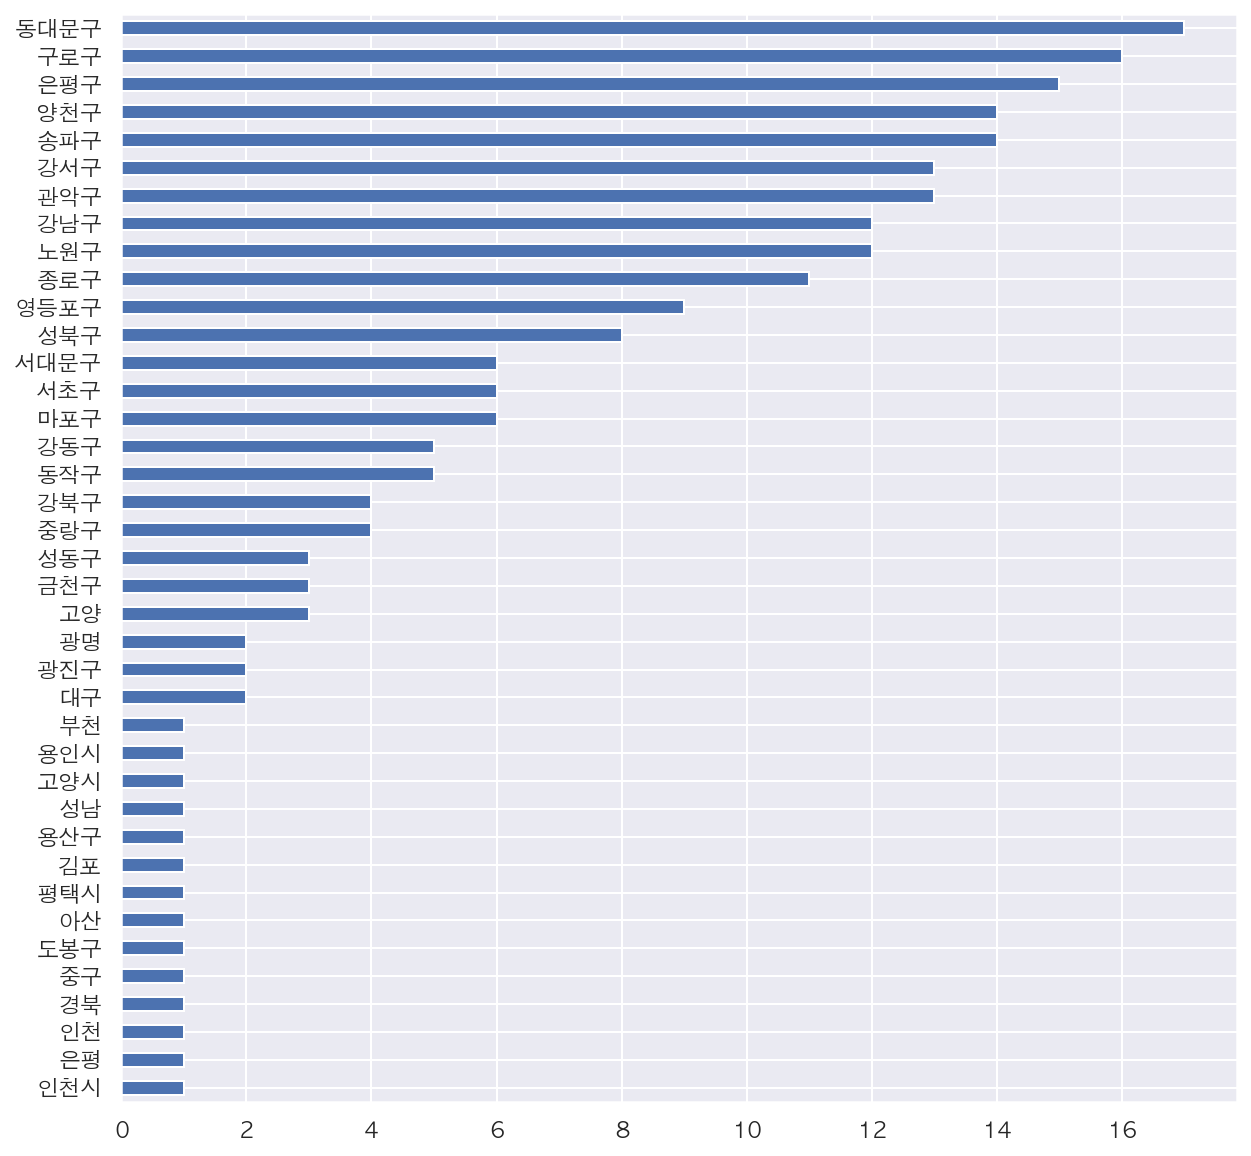

In [8]:
df["거주지"].value_counts().sort_values().plot.barh(figsize=(10, 10))

## 조치사항

In [9]:
df["조치사항"].value_counts()

서울의료원          67
서남병원           49
보라매병원          20
서울의료원(퇴원)      12
국립중앙의료원        11
서북병원            9
서울대학교병원(퇴원)     9
국립중앙의료원(퇴원)     7
타시도이관           5
중앙대학교병원(퇴원)     3
고대구로병원          2
인제대상계백병원        2
확인중             2
타시도 이관          2
한일병원(퇴원)        2
보라매병원(퇴원)       2
서울대학교병원         2
삼육서울병원          2
순천향서울병원         2
서울백병원           1
상계백병원           1
타시도이관(퇴원)       1
한양대학교병원         1
한양대학교병원(퇴원)     1
강남세브란스병원        1
중앙대학교병원         1
서남병원(퇴원)        1
한일병원            1
Name: 조치사항, dtype: int64

In [10]:
df["확진일"].value_counts()

3.10.     46
3.9.      26
3.11.     16
2.25.     16
2.27.     12
3.8.      10
2.26.     10
3.7.       7
2.28.      7
3.6.       7
3.1.       6
3.2.       6
3.4.       5
2.20.      5
2.29.      5
2.23.      4
2.22.      4
2.24.      3
1.30.      3
1.31.      3
2.16.      2
2.19.      2
2.21.      2
2.5.       2
3.3.       1
2.24..     1
1.23.      1
3.12.      1
2.25       1
2.27       1
2.2.       1
2.7.       1
3.5.       1
2.6.       1
Name: 확진일, dtype: int64

In [11]:
df["확진일자"] = pd.to_datetime("2020"+ "-" + df["확진일"].str.replace(".", "-"))
df["확진일자"].head()

85   2020-03-12
86   2020-03-11
87   2020-03-11
88   2020-03-11
89   2020-03-11
Name: 확진일자, dtype: datetime64[ns]

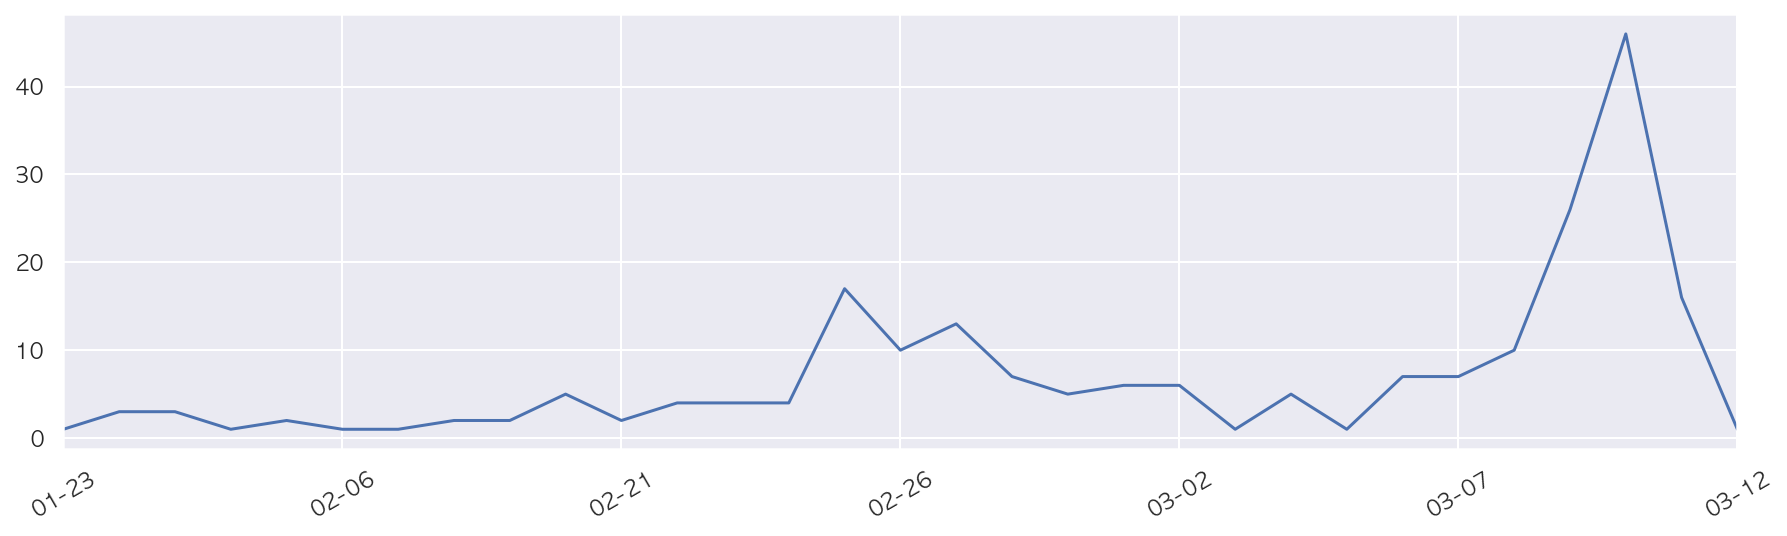

In [12]:
df["월일"] = df["확진일자"].astype(str).map(lambda x : x[-5:])
df["월일"].value_counts().sort_index().plot(figsize=(15, 4), rot=30)

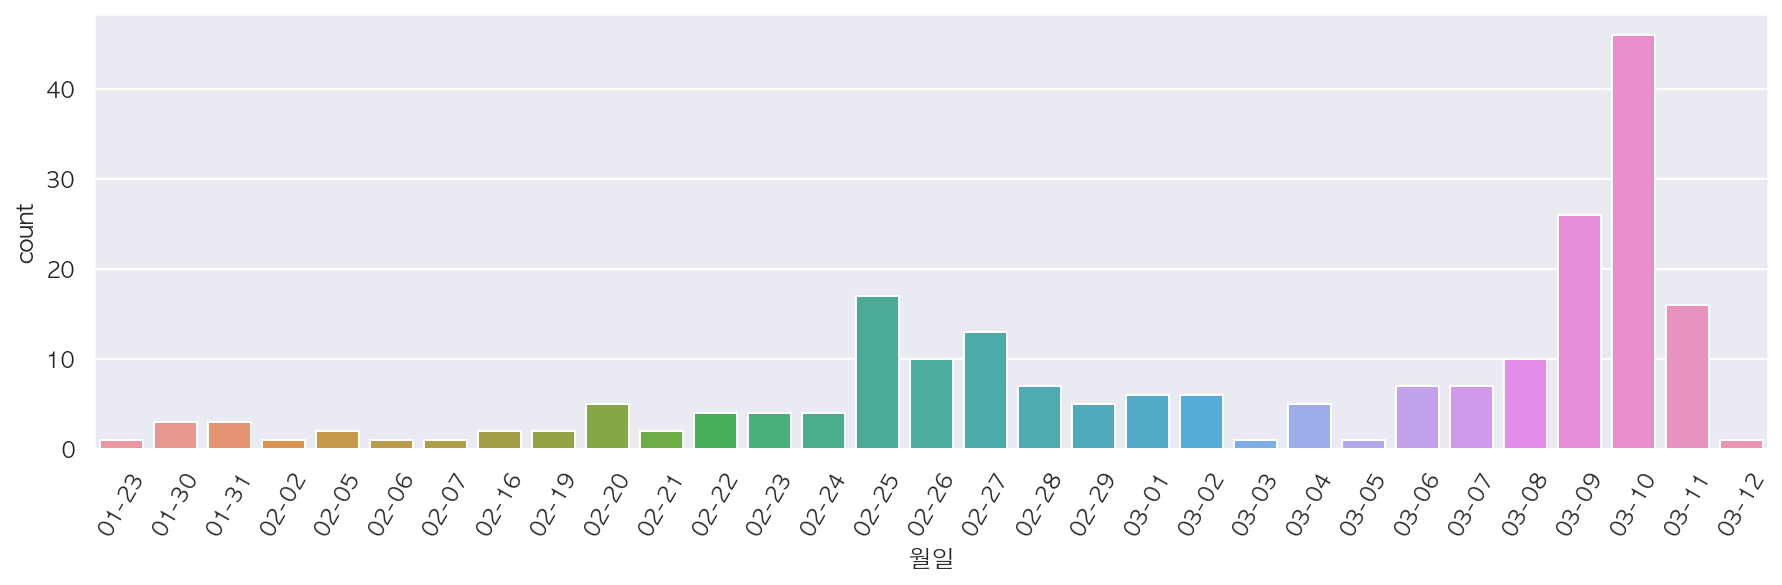

In [13]:
import matplotlib.pyplot as plt
plt.figure(figsize=(15, 4))
plt.xticks(rotation=60)
sns.countplot(data=df.sort_values(by="월일"), x="월일")

## 누적확진

In [14]:
cum = df.groupby(["확진일자"])["연번"].count()
cum

확진일자
2020-01-23     1
2020-01-30     3
2020-01-31     3
2020-02-02     1
2020-02-05     2
2020-02-06     1
2020-02-07     1
2020-02-16     2
2020-02-19     2
2020-02-20     5
2020-02-21     2
2020-02-22     4
2020-02-23     4
2020-02-24     4
2020-02-25    17
2020-02-26    10
2020-02-27    13
2020-02-28     7
2020-02-29     5
2020-03-01     6
2020-03-02     6
2020-03-03     1
2020-03-04     5
2020-03-05     1
2020-03-06     7
2020-03-07     7
2020-03-08    10
2020-03-09    26
2020-03-10    46
2020-03-11    16
2020-03-12     1
Name: 연번, dtype: int64

In [15]:
# 데이터프레임의 첫번째 날짜는 first_day 에 마지막 날짜는 last_day 에 담습니다.

first_day = df.iloc[-1]["확진일자"]
last_day = df.iloc[0]["확진일자"]
first_day, last_day

(Timestamp('2020-01-23 00:00:00'), Timestamp('2020-03-12 00:00:00'))

In [16]:
# pd.date_range 를 통해 시작하는 날짜부터 끝나는 날짜까지의 DatetimeIndex 를 만들고 days 라는 변수에 저장합니다.
days = pd.date_range(first_day, last_day)
days

DatetimeIndex(['2020-01-23', '2020-01-24', '2020-01-25', '2020-01-26',
               '2020-01-27', '2020-01-28', '2020-01-29', '2020-01-30',
               '2020-01-31', '2020-02-01', '2020-02-02', '2020-02-03',
               '2020-02-04', '2020-02-05', '2020-02-06', '2020-02-07',
               '2020-02-08', '2020-02-09', '2020-02-10', '2020-02-11',
               '2020-02-12', '2020-02-13', '2020-02-14', '2020-02-15',
               '2020-02-16', '2020-02-17', '2020-02-18', '2020-02-19',
               '2020-02-20', '2020-02-21', '2020-02-22', '2020-02-23',
               '2020-02-24', '2020-02-25', '2020-02-26', '2020-02-27',
               '2020-02-28', '2020-02-29', '2020-03-01', '2020-03-02',
               '2020-03-03', '2020-03-04', '2020-03-05', '2020-03-06',
               '2020-03-07', '2020-03-08', '2020-03-09', '2020-03-10',
               '2020-03-11', '2020-03-12'],
              dtype='datetime64[ns]', freq='D')

In [17]:
# days 변수의 값으로 "연월일" 이라는 컬럼이름을 갖는 데이터프레임을 만듭니다.
days = pd.DataFrame({"확진일자": days})
days.head()

,확진일자
0,2020-01-23
1,2020-01-24
2,2020-01-25
3,2020-01-26
4,2020-01-27


In [18]:
all_day = days.merge(cum, left_on="확진일자", right_on=cum.index, how="left")
all_day.head()

,확진일자,연번
0,2020-01-23,1.0
1,2020-01-24,NaN
2,2020-01-25,NaN
3,2020-01-26,NaN
4,2020-01-27,NaN


In [19]:
all_day["누적확진"] = all_day["연번"].fillna(0).cumsum()
all_day

,확진일자,연번,누적확진
0,2020-01-23,1.0,1.0
1,2020-01-24,NaN,1.0
2,2020-01-25,NaN,1.0
3,2020-01-26,NaN,1.0
4,2020-01-27,NaN,1.0
5,2020-01-28,NaN,1.0
6,2020-01-29,NaN,1.0
7,2020-01-30,3.0,4.0
8,2020-01-31,3.0,7.0
9,2020-02-01,NaN,7.0


In [20]:
all_day["일자"] = all_day["확진일자"].astype(str).map(lambda x: x[-5:])
all_day["일자"].head()

0    01-23
1    01-24
2    01-25
3    01-26
4    01-27
Name: 일자, dtype: object

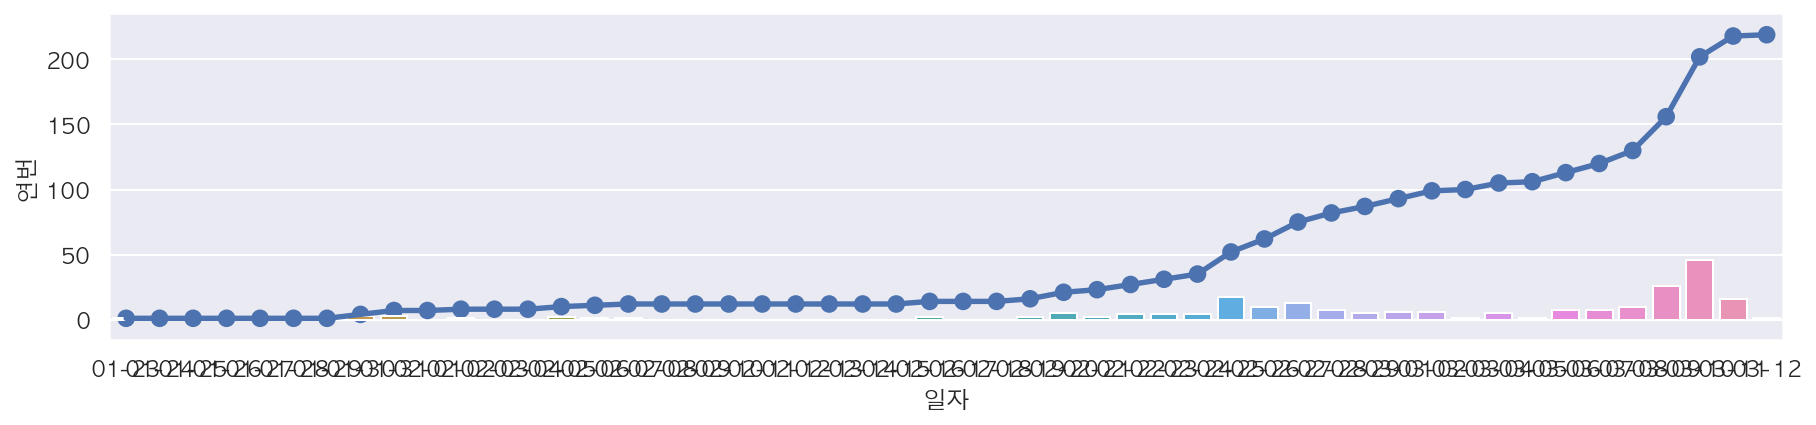

In [21]:
plt.figure(figsize=(15, 3))
sns.pointplot(data=all_day, x="일자", y="누적확진")
sns.barplot(data=all_day, x="일자", y="연번")

## 접촉력

In [22]:
df["접촉력"].value_counts()

구로구 콜센터 관련           53
확인중                  21
콜센터직원 접촉             17
성동구 주상복합 관리사무소 관련    13
해외 접촉                13
타시도 확진자 접촉           10
-                     9
은평성모병원관련              7
은평성모병원 관련             6
대구 방문                 5
#7103 접촉              4
대구 확진자 접촉             3
#6 접촉자                3
타시도 확진자 접촉자           3
해외접촉                  3
#6832 접촉자             2
#5592 접촉(추정)          2
명성교회 관련               2
#780 접촉자              2
타시도 확진자 접촉            2
#7247 접촉(추정)          2
신천지대구교회 관련            2
#794 접촉자              2
#29접촉자                1
#7280 접촉(추정)          1
대구 방문(명성교회)           1
부동산 중개 법인관련           1
#30접촉자(추정)            1
#935 접촉자              1
경찰병원관련                1
#7500 접촉(추정)          1
부동산중개법인관련             1
#3 접촉자                1
#6937 접촉자             1
해외 접촉(추정)             1
확잍중                   1
#6921접촉자              1
쇼핑몰 관련                1
#2621번 접촉자            1
#136접촉자               1
#1247 접촉자             1
부동산 중개업 관련      

In [23]:
df["접촉경로"] = df["접촉력"]
df.loc[df["접촉력"].str.contains("접촉자"), "접촉경로"] = "접촉자"
df.loc[df["접촉력"].str.contains("은평성모"), "접촉경로"] = "은평성모병원"
df.loc[df["접촉력"].str.contains("가족"), "접촉경로"] = "가족"
df.loc[df["접촉력"].str.contains("부동산"), "접촉경로"] = "부동산중개법인"
df.loc[df["접촉력"].str.contains("확잍중"), "접촉경로"] = "확인중"

In [24]:
df["접촉경로"].value_counts()

구로구 콜센터 관련           53
접촉자                  25
확인중                  22
콜센터직원 접촉             17
은평성모병원               14
성동구 주상복합 관리사무소 관련    13
해외 접촉                13
타시도 확진자 접촉           10
-                     9
대구 방문                 5
#7103 접촉              4
대구 확진자 접촉             3
부동산중개법인               3
해외접촉                  3
신천지대구교회 관련            2
#5592 접촉(추정)          2
명성교회 관련               2
#7247 접촉(추정)          2
타시도 확진자 접촉            2
해외 접촉(추정)             1
서울재생병원 관련             1
대구 거주자                1
쇼핑몰 관련                1
대구 방문(명성교회)           1
#7280 접촉(추정)          1
#6959 접촉(추정)          1
경찰병원관련                1
#7300 접촉              1
#6727 첩촉              1
#7500 접촉(추정)          1
대구 거주                 1
여의도 건설현장 관련           1
가족                    1
여의도 건설현장관련            1
Name: 접촉경로, dtype: int64

## 가장 많은 전파가 일어난 번호

In [25]:
import re

re.sub("[^0-9]", "", "#7265 접촉(추정)")

'7265'

In [26]:
def find_contactor(contactor):
    return re.sub("[^0-9]", "", contactor)
    
find_contactor("#7265 접촉(추정)")

'7265'

In [27]:
df["접촉번호"] = df["접촉력"].map(find_contactor)
contact = df["접촉번호"].value_counts().reset_index()
# contact = contact.drop(0)
contact.columns = ["환자번호", "전파수"]
contact.head()

,환자번호,전파수
0,,183
1,7103,4
2,6,4
3,780,3
4,6832,2


In [28]:
top_contact = contact.merge(df, left_on="환자번호", right_on="환자")
top_contact.head()

,환자번호,전파수,연번,환자,확진일,성별(출생년),거주지,여행력,접촉력,조치사항,확진일자,월일,접촉경로,접촉번호
0,7103,4,120,7103,3.6.,남('81),성북구,-,확인중,서남병원,2020-03-06,03-06,확인중,
1,6,4,3,6,1.30.,남(‵64),종로구,-,#3 접촉자,서울대학교병원(퇴원),2020-01-30,01-30,접촉자,3
2,780,3,31,780,2.22.,남('65),송파구,,대구 방문,중앙대학교병원,2020-02-22,02-22,대구 방문,
3,6832,2,111,6832,3.4.,남('84),강북구,-,타시도 확진자 접촉,서남병원,2020-03-04,03-04,타시도 확진자 접촉,
4,794,2,33,794,2.24.,여('70),송파구,-,#780 접촉자,서울의료원(퇴원),2020-02-24,02-24,접촉자,780


In [29]:
top_contactor = top_contact.iloc[0, 0]
top_contactor

'7103'

In [30]:
df[df["접촉경로"].str.contains(top_contactor)]

,연번,환자,확진일,성별(출생년),거주지,여행력,접촉력,조치사항,확진일자,월일,접촉경로,접촉번호
185,129,7297,3.8.,여('52),동대문구,-,#7103 접촉,보라매병원,2020-03-08,03-08,#7103 접촉,7103
186,128,7281,3.8.,남('51),동대문구,-,#7103 접촉,보라매병원,2020-03-08,03-08,#7103 접촉,7103
188,126,7275,3.8.,여('82),동대문구,-,#7103 접촉,보라매병원,2020-03-08,03-08,#7103 접촉,7103
193,121,7219,3.8.,여('20),동대문구,-,#7103 접촉,보라매병원,2020-03-08,03-08,#7103 접촉,7103


In [31]:
pd.options.display.max_rows = 100

In [32]:
df[df["접촉경로"].str.contains("콜센터")]

,연번,환자,확진일,성별(출생년),거주지,여행력,접촉력,조치사항,확진일자,월일,접촉경로,접촉번호
85,219,확인중,3.12.,여('84),중랑구,-,콜센터직원 접촉,확인중,2020-03-12,03-12,콜센터직원 접촉,
86,218,확인중,3.11.,남('74),구로구,-,콜센터직원 접촉,확인중,2020-03-11,03-11,콜센터직원 접촉,
90,214,확인중,3.11.,여('69),서대문구,-,구로구 콜센터 관련,서남병원,2020-03-11,03-11,구로구 콜센터 관련,
96,209,확인중,3.11.,남('41),구로구,-,콜센터직원 접촉,보라매병원,2020-03-11,03-11,콜센터직원 접촉,
97,208,확인중,3.11.,남('73),중랑구,-,구로구 콜센터 관련,서울의료원,2020-03-11,03-11,구로구 콜센터 관련,
100,205,확인중,3.11.,여('94),강서구,-,콜센터직원 접촉,서남병원,2020-03-11,03-11,콜센터직원 접촉,
101,204,확인중,3.11.,남('67),강서구,-,콜센터직원 접촉,서남병원,2020-03-11,03-11,콜센터직원 접촉,
102,203,확인중,3.11.,남('99),강서구,-,콜센터직원 접촉,서남병원,2020-03-11,03-11,콜센터직원 접촉,
103,202,확인중,3.10.,남('59),노원구,-,콜센터직원 접촉,서울의료원,2020-03-10,03-10,콜센터직원 접촉,
104,201,확인중,3.10.,남('89),노원구,-,콜센터직원 접촉,서울의료원,2020-03-10,03-10,콜센터직원 접촉,


## 누적 확진자 수 구하기